# Library Imports

In [ ]:
# @title installation
%pip install langchain_community nltk==3.5 sacrebleu sacremoses datasets  prettytable psutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 22.5 MB/s eta 0:00:00
   

In [ ]:
# @title Imports
# Standard Library Imports
import time
import subprocess
import concurrent.futures
from collections import Counter

# Data Science and Visualization Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams

# Transformers and Language Processing
from transformers import (
    MBartForConditionalGeneration,
    MBart50TokenizerFast,
    MarianMTModel,
    MarianTokenizer,
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
)
from langchain_text_splitters import Language, RecursiveCharacterTextSplitter
from datasets import load_metric, load_dataset

# Deep Learning Libraries
import torch
import tensorflow as tf

# Service Libraries
import openai
from google.colab import drive

# System Information Libraries
import platform
import psutil
from prettytable import PrettyTable
from datetime import datetime


# Project Overview


*   Data Collection
*   Data Analysis
*   Data Preprocessing
*   Model Selection
*   Language Transilation
*   Evaluation - Quantitative
*   Evaluation - Qualitative




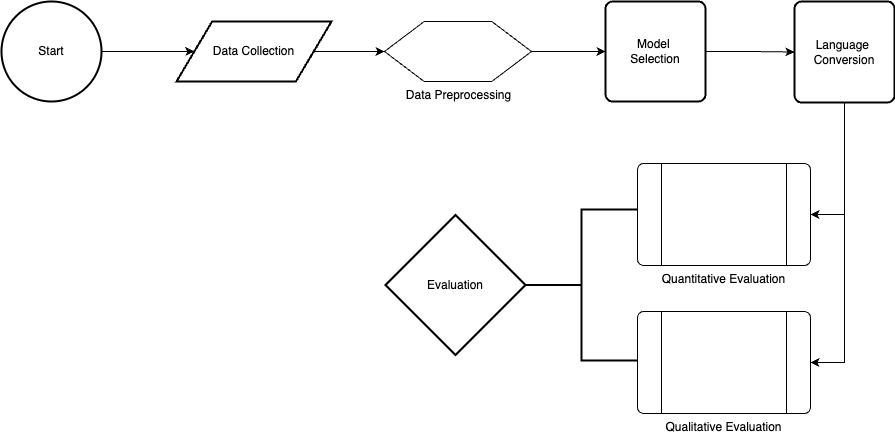

In [ ]:
# @title Project High Level Architecture
from IPython.display import Image
img_source = "Project High Level Flowchart.png"
#load the image and show it

Image(filename=img_source)

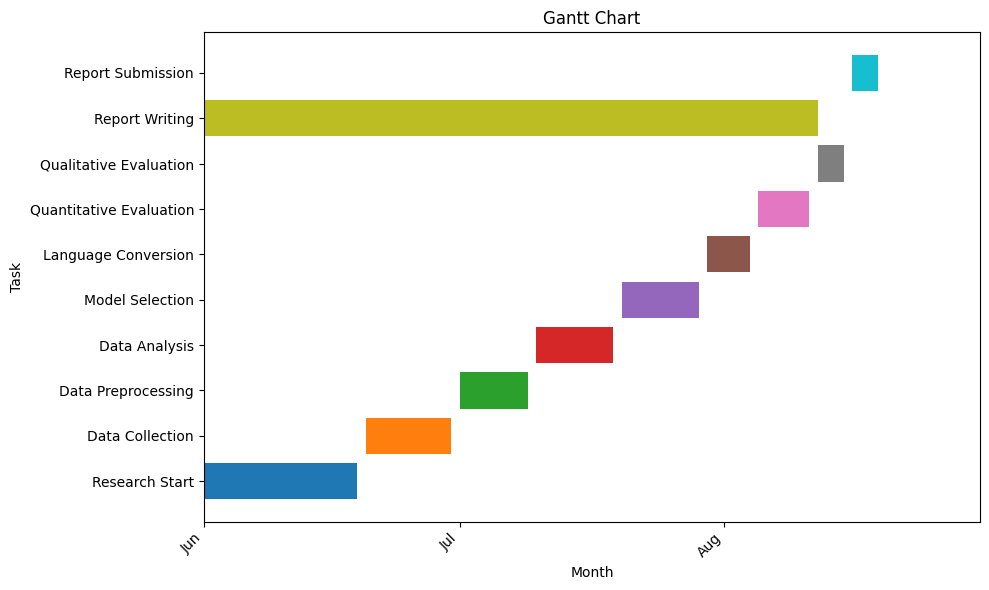

In [ ]:
# @title Project Plan


# Data with an additional task
data = {
    "Task": [
        "Research Start",
        "Data Collection",
        "Data Preprocessing",
        "Data Analysis",
        "Model Selection",
        "Language Conversion",
        "Quantitative Evaluation",
        "Qualitative Evaluation",
        "Report Writing",
        "Report Submission"
    ],
    "Start": [
        "01-06", "20-06", "01-07", "10-07", "20-07", "30-07", "05-08", "12-08", "01-06", "16-08"
    ],
    "End": [
        "19-06", "30-06", "09-07", "19-07", "29-07", "04-08", "11-08", "15-08", "12-08", "19-08"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Start and End to datetime
df['Start'] = pd.to_datetime(df['Start'], format='%d-%m').apply(lambda x: x.replace(year=2024))
df['End'] = pd.to_datetime(df['End'], format='%d-%m').apply(lambda x: x.replace(year=2024))

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each task as a horizontal bar
for index, row in df.iterrows():
    ax.barh(row['Task'], (row['End'] - row['Start']).days, left=row['Start'])

# Format the x-axis as months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set the x-axis limits to start from February and end in August
ax.set_xlim([datetime(2024, 6, 1), datetime(2024, 8, 31)])

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Task')
ax.set_title('Gantt Chart')

# Rotate and align the x labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Hardware Setup

In [ ]:
# @title

# #check for the gpu and ram configuration




def get_gpu_info():
    # Check if GPU is available
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        gpu_vendor = "NVIDIA"
        gpu_memory = str(round(torch.cuda.get_device_properties(0).total_memory / (1024**3), 2)) + " GB"
    elif len(tf.config.list_physical_devices('GPU')) > 0:
        physical_devices = tf.config.list_physical_devices('GPU')
        gpu_name = physical_devices[0].name
        gpu_vendor = "NVIDIA"
        gpu_memory = "Check TensorFlow API"
    else:
        gpu_name = "N/A"
        gpu_vendor = "N/A"
        gpu_memory = "N/A"

    return gpu_name, gpu_vendor, gpu_memory

def print_system_configuration():
    # Create a PrettyTable object
    table = PrettyTable()

    # Add column headers
    table.field_names = ["Configuration", "Details"]

    # Gather system information
    uname = platform.uname()
    system = uname.system
    node_name = uname.node
    release = uname.release
    version = uname.version
    machine = uname.machine
    processor = uname.processor
    architecture = platform.architecture()[0]
    ram = str(round(psutil.virtual_memory().total / (1024**3), 2)) + " GB"
    cpu_count = psutil.cpu_count(logical=True)
    disk_total = str(round(psutil.disk_usage('/').total / (1024**3), 2)) + " GB"
    disk_used = str(round(psutil.disk_usage('/').used / (1024**3), 2)) + " GB"
    disk_free = str(round(psutil.disk_usage('/').free / (1024**3), 2)) + " GB"

    # GPU information
    gpu_name, gpu_vendor, gpu_memory = get_gpu_info()

    # Add rows to the table
    table.add_row(["System", system])
    table.add_row(["Node Name", node_name])
    table.add_row(["Release", release])
    table.add_row(["Version", version])
    table.add_row(["Machine", machine])
    table.add_row(["Processor", processor])
    table.add_row(["Architecture", architecture])
    table.add_row(["RAM", ram])
    table.add_row(["CPU Count", cpu_count])
    table.add_row(["Disk Total", disk_total])
    table.add_row(["Disk Used", disk_used])
    table.add_row(["Disk Free", disk_free])
    table.add_row(["GPU Name", gpu_name])
    table.add_row(["GPU Vendor", gpu_vendor])
    table.add_row(["GPU Memory", gpu_memory])

    # Print the table
    print(table)

# Call the function
print_system_configuration()


+---------------+-----------------------------------------------------+
| Configuration |                       Details                       |
+---------------+-----------------------------------------------------+
|     System    |                        Linux                        |
|   Node Name   |                     d89c9a840224                    |
|    Release    |                       6.1.85+                       |
|    Version    | #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 |
|    Machine    |                        x86_64                       |
|   Processor   |                        x86_64                       |
|  Architecture |                        64bit                        |
|      RAM      |                       83.48 GB                      |
|   CPU Count   |                          12                         |
|   Disk Total  |                      201.23 GB                      |
|   Disk Used   |                       30.79 GB                

In [ ]:
drive.mount('/content/drive')
#!mkdir "/content/drive/MyDrive/GermanMachineTransilationProject"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data Collection

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the English and German Wikipedia datasets with streaming
english_dataset = load_dataset("legacy-datasets/wikipedia", "20220301.en", split='train', streaming=True)
german_dataset = load_dataset("legacy-datasets/wikipedia", "20220301.de", split='train', streaming=True)

# Create an empty list to store the matched rows
combined_rows = []

# Create iterators for both datasets
english_iterator = iter(english_dataset)
german_iterator = iter(german_dataset)

# Use dictionaries to store title-indexed data
english_data = {}
german_data = {}

# Iterate through both datasets simultaneously to find matching titles
for i in range(20000):  # Adjust the range to control the number of rows to match
    try:
        english_row = next(english_iterator)
        if english_row['title'] and english_row['text']:  # Check if both title and text are non-empty
            english_data[english_row['title']] = english_row
    except StopIteration:
        break

    try:
        german_row = next(german_iterator)
        if german_row['title'] and german_row['text']:  # Check if both title and text are non-empty
            german_data[german_row['title']] = german_row
    except StopIteration:
        break

    # If a title is in both datasets, combine the rows
    if english_row['title'] in german_data and german_data[english_row['title']]['text']:
        combined_row = {
            "english_title": english_row['title'],
            "english_text": english_row['text'],
            "german_title": german_data[english_row['title']]['title'],
            "german_text": german_data[english_row['title']]['text'],
        }
        combined_rows.append(combined_row)
    elif german_row['title'] in english_data and english_data[german_row['title']]['text']:
        combined_row = {
            "english_title": english_data[german_row['title']]['title'],
            "english_text": english_data[german_row['title']]['text'],
            "german_title": german_row['title'],
            "german_text": german_row['text'],
        }
        combined_rows.append(combined_row)

# Convert the list of combined rows into a DataFrame
combined_df = pd.DataFrame(combined_rows)


In [ ]:
#save the combined dataframe

combined_df.to_csv('/content/drive/MyDrive/GermanMachineTransilationProject/combined_data.csv', index=False)


In [ ]:
#read the combined dataframe
combined_df = pd.read_csv("/content/drive/MyDrive/GermanMachineTransilationProject/combined_data.csv")

In [ ]:
combined_df

,english_title,english_text,german_title,german_text
0,Alphabet,An alphabet is a standardized set of basic wri...,Alphabet,Ein Alphabet (frühneuhochdeutsch von kirchenla...
1,Abraham Lincoln,"Abraham Lincoln (; February 12, 1809 – April 1...",Abraham Lincoln,Abraham Lincoln (* 12. Februar 1809 bei Hodge...
2,Afghanistan,"Afghanistan (), officially the Islamic Emirate...",Afghanistan,Afghanistan (paschtunisch und ) ist ein Binnen...
3,Ampere,"The ampere (, ; symbol: A), often shortened to...",Ampere,"Das Ampere [] mit Einheitenzeichen A, benannt ..."
4,Arthur Schopenhauer,"Arthur Schopenhauer ( , ; 22 February 1788 – 2...",Arthur Schopenhauer,Arthur Schopenhauer (* 22. Februar 1788 in Dan...
...,...,...,...,...
4068,Merlot,Merlot is a dark blue–colored wine grape varie...,Merlot,Merlot Noir oder Merlot [] ist eine Rotweinsor...
4069,Elie Wiesel,"Elie Wiesel (, born Eliezer Wiesel ʾÉlīʿezer ...",Elie Wiesel,Elie Wiesel ([]; geboren am 30. September 1928...
4070,Paul Feyerabend,"Paul Karl Feyerabend (; ; January 13, 1924 – F...",Paul Feyerabend,Paul Karl Feyerabend (* 13. Januar 1924 in Wie...
4071,Louis Bonaparte,Louis Napoléon Bonaparte (born Luigi Buonapart...,Louis Bonaparte,Louis Napoléon Bonaparte (* 2. September 1778 ...


In [ ]:
def gettillclastsentence(df,context_length):
    # Define the lambda function to clean up each entry
    clean_text = lambda text: text[:text.rfind('.') + 1] if text[-1] != '.' else text
    df['english_text'] = df['english_text'].apply(lambda x: x[:context_length])
    df['german_text'] = df['german_text'].apply(lambda x: x[:context_length])
    # Apply the lambda function to 'english_text' and 'german_text' columns
    df["english_text"] = df["english_text"].apply(clean_text)
    df["german_text"] = df["german_text"].apply(clean_text)

    return df

# Example usage:
cleaned_df = gettillclastsentence(combined_df,256)


In [ ]:
cleaned_df["german_text"][1]

'Abraham Lincoln  (* 12. Februar 1809 bei Hodgenville, Hardin County, heute: LaRue County, Kentucky; † 15. April 1865 in Washington, D.C.) amtierte von 1861 bis 1865 als 16. Präsident der Vereinigten Staaten von Amerika.'

In [ ]:
df = pd.DataFrame({})

# EDA

## Initial Data Analysis

In [ ]:
# @title
# Basic Overview
print("Basic Overview of the Dataset")
print("Shape of the dataset: ", combined_df.shape)
print("\nData Types:\n", combined_df.dtypes)
print("\nBasic Statistics:\n", combined_df.describe())

Basic Overview of the Dataset
Shape of the dataset:  (2596, 4)

Data Types:
 english_title    object
english_text     object
german_title     object
german_text      object
dtype: object

Basic Statistics:
        english_title                                       english_text  \
count           2596                                               2596   
unique          2596                                               2596   
top             1470  Year 1470 (MCDLXX) was a common year starting ...   
freq               1                                                  1   

       german_title                                        german_text  
count          2596                                               2596  
unique         2596                                               2596  
top            1470  \n\nEreignisse\n\nPolitik und Weltgeschehen\n\...  
freq              1                                                  1  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top 20 Most Common Words:
 [('b', 31740), ('american', 25932), ('first', 19575), ('also', 18684), ('new', 15825), ('may', 15152), ('one', 15078), ('english', 11374), ('city', 10881), ('used', 10655), ('german', 10547), ('march', 10487), ('french', 10293), ('two', 10243), ('january', 10204), ('july', 10132), ('united', 9943), ('october', 9941), ('september', 9907), ('time', 9900)]

Top 20 Most Common Bigrams:
 [(('united', 'states'), 7127), (('new', 'york'), 3662), (('prime', 'minister'), 2926), (('american', 'actor'), 2736), (('american', 'actress'), 2288), (('b', 'march'), 2126), (('b', 'december'), 2107), (('b', 'october'), 2103), (('b', 'may'), 2086), (('b', 'august'), 2048), (('b', 'april'), 2027), (('approximate', 'date'), 2024), (('b', 'september'), 2022), (('b', 'november'), 2017), (('b', 'july'), 2003), (('b', 'february'), 1949), (('world', 'war'), 1923), (('b', 'june'), 1918), (('b', 'january'), 1712), (('united', 'kingdom'), 1400)]


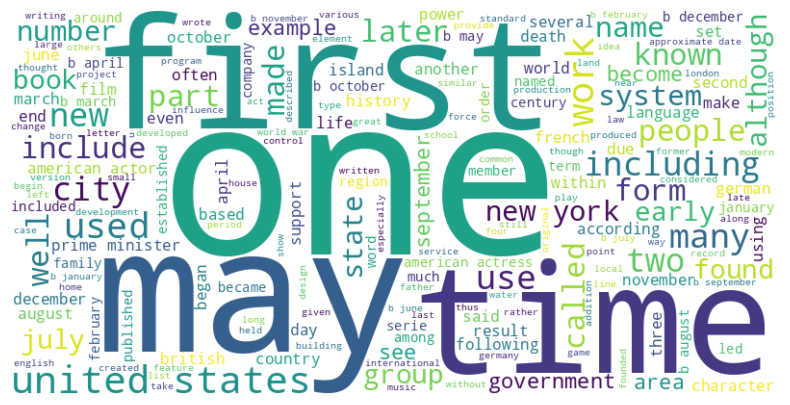

In [ ]:
# @title
# NLP based Anaalytics
nltk.download('punkt')
nltk.download('stopwords')

text_data = combined_df["english_text"].dropna().str.lower()

# Tokenization and Stopword Removal
stop_words = set(stopwords.words('english'))
text_data = text_data.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha() and word not in stop_words]))

all_words = ' '.join(text_data).split()
word_freq = Counter(all_words)

print("\nTop 20 Most Common Words:\n", word_freq.most_common(20))

bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams)
print("\nTop 20 Most Common Bigrams:\n", bigram_freq.most_common(20))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

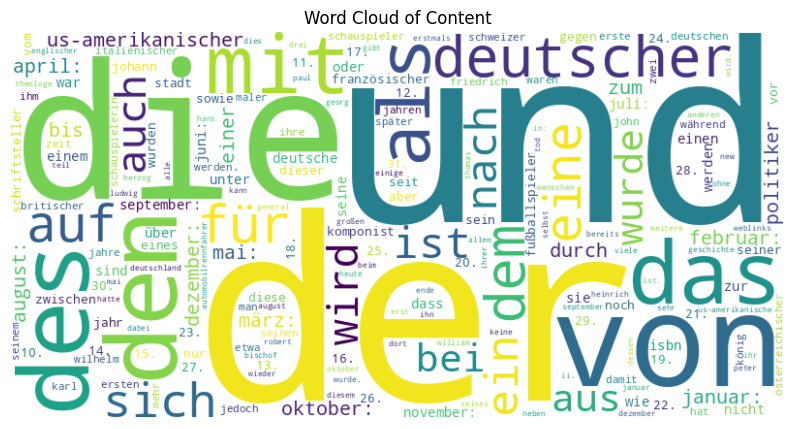

In [ ]:
# @title
content_words = ' '.join(combined_df['german_text']).lower().split()
content_words = [word for word in content_words if word not in stop_words and len(word) > 2]
content_word_counts = Counter(content_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(content_word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()

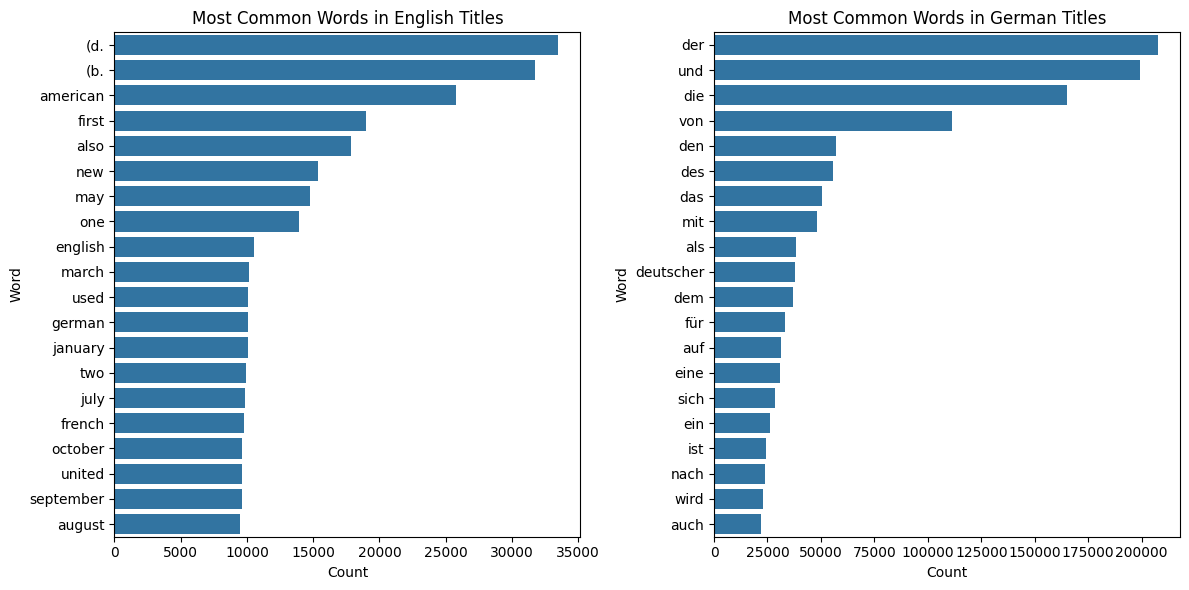

In [ ]:
# @title
# Most common words in titles
english_title_words = ' '.join(combined_df['english_text']).lower().split()
english_title_words = [word for word in english_title_words if word not in stop_words and len(word) > 2]
english_title_word_counts = Counter(english_title_words)

english_title_common_words = english_title_word_counts.most_common(20)
english_title_common_words_df = pd.DataFrame(english_title_common_words, columns=['word', 'count'])

german_title_words = ' '.join(combined_df['german_text']).lower().split()
german_title_words = [word for word in german_title_words if len(word) > 2]
german_title_word_counts = Counter(german_title_words)

german_title_common_words = german_title_word_counts.most_common(20)
german_title_common_words_df = pd.DataFrame(german_title_common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=english_title_common_words_df, x='count', y='word')
plt.title('Most Common Words in English Titles')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(data=german_title_common_words_df, x='count', y='word')
plt.title('Most Common Words in German Titles')
plt.xlabel('Count')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

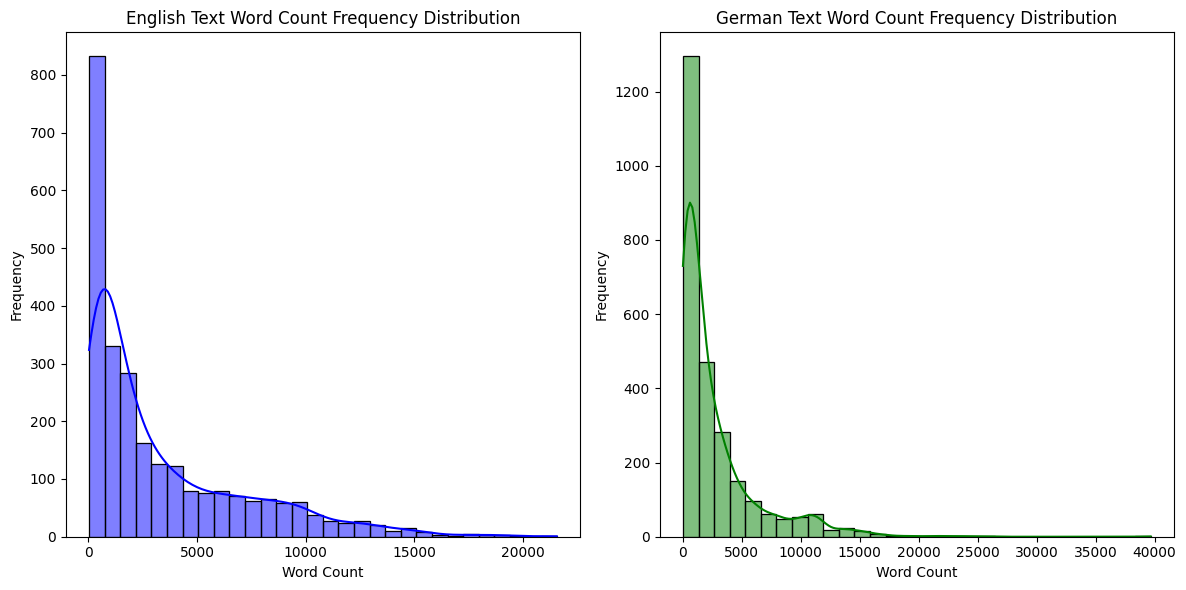

English Text Word Count Statistics:
 count     2596.000000
mean      3403.871341
std       3768.819582
min         29.000000
25%        554.000000
50%       1780.000000
75%       5138.250000
max      21557.000000
Name: english_word_count, dtype: float64

German Text Word Count Statistics:
 count     2596.000000
mean      2680.892142
std       3548.019841
min         18.000000
25%        355.750000
50%       1346.500000
75%       3355.250000
max      39655.000000
Name: german_word_count, dtype: float64


In [ ]:
# @title
combined_df['english_word_count'] = combined_df['english_text'].apply(lambda x: len(str(x).split()))
combined_df['german_word_count'] = combined_df['german_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['english_word_count'], bins=30, kde=True, color='blue')
plt.title('English Text Word Count Frequency Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(combined_df['german_word_count'], bins=30, kde=True, color='green')
plt.title('German Text Word Count Frequency Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("English Text Word Count Statistics:\n", combined_df['english_word_count'].describe())
print("\nGerman Text Word Count Statistics:\n", combined_df['german_word_count'].describe())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model Load

In [ ]:

# Models and Tokenizers
models = {
    "MarianMT": ("Helsinki-NLP/opus-mt-de-en", MarianMTModel, MarianTokenizer),
    "mBART": ("facebook/mbart-large-50-many-to-many-mmt", MBartForConditionalGeneration, MBart50TokenizerFast),
    "Tsmall100": ("alirezamsh/small100", AutoModelForSeq2SeqLM, AutoTokenizer)
}

In [ ]:
df = cleaned_df.iloc[:300, :]
df

,english_title,english_text,german_title,german_text
0,Alphabet,An alphabet is a standardized set of basic wri...,Alphabet,Ein Alphabet (frühneuhochdeutsch von kirchenla...
1,Abraham Lincoln,"Abraham Lincoln (; February 12, 1809 – April 1...",Abraham Lincoln,Abraham Lincoln (* 12. Februar 1809 bei Hodge...
2,Afghanistan,"Afghanistan (), officially the Islamic Emirate...",Afghanistan,Afghanistan (paschtunisch und ) ist ein Binnen...
3,Ampere,"The ampere (, ; symbol: A), often shortened to...",Ampere,"Das Ampere [] mit Einheitenzeichen A, benannt ..."
4,Arthur Schopenhauer,"Arthur Schopenhauer ( , ; 22 February 1788 – 2...",Arthur Schopenhauer,Arthur Schopenhauer (* 22. Februar 1788 in Dan...
...,...,...,...,...
295,Bertrand Russell,"Bertrand Arthur William Russell, 3rd Earl Russ...",Bertrand Russell,"Bertrand Arthur William Russell, 3. Earl Russe..."
296,Indigo,Indigo is a deep color close to the color whee...,Indigo,Indigo (von ; nach dem Herkunftsgebiet Ostindi...
297,Internet Protocol,The Internet Protocol (IP) is the network laye...,Internet Protocol,Das Internet Protocol (IP) ist ein in Computer...
298,Bikini,A bikini is a women's two-piece swimsuit featu...,Bikini,Der Bikini ist eine zweiteilige Badebekleidung...


In [ ]:
dfdata = pd.DataFrame({})
inferenceTime = {}
mbart_translated = []
tsmall_translated = []
marianmt_translated = []

In [ ]:
docs = df['german_text'].tolist()

In [ ]:
# @title Sequential 100 rows of data

import time
import torch
import pandas as pd

# Assuming `models`, `docs`, `device`, `mbart_translated`, `tsmall_translated`, `marianmt_translated`, `inferenceTime`, and `dfdata` are defined elsewhere in your code.

for model_name, (model_checkpoint, model_class, tokenizer_class) in models.items():
    # Load model and tokenizer
    print(model_name)
    model = model_class.from_pretrained(model_checkpoint).to(device)  # Ensure the model is moved to the correct device
    tokenizer = tokenizer_class.from_pretrained(model_checkpoint)
    translated = []
    start_time = time.time()

    for i in range(0, len(docs)):
        try:
            if model_name == "mBART":
                tokenizer.src_lang = "de_DE"
                doc = docs[i]
                if len(doc) > 512:
                    doc = doc[:512]  # Truncate to 512 tokens if necessary
                encoded_de = tokenizer(doc, return_tensors="pt").to(device)  # Ensure input tensors are on the correct device
                generated_tokens = model.generate(
                    **encoded_de,
                    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
                )
                translated_chunk = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
                mbart_translated.append(translated_chunk[0])
        except Exception as e:
            print(f"Error in mBART: {e}")
            pass

        try:
            if model_name == "Tsmall100":
                encoded_de = tokenizer(docs[i], return_tensors="pt").to(device)  # Ensure input tensors are on the correct device
                generated_tokens = model.generate(**encoded_de)
                translated_chunk = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
                tsmall_translated.append(translated_chunk[0])
        except Exception as e:
            print(f"Error in Tsmall100: {e}")
            pass

        try:
            if model_name == "MarianMT":
                encoded_de = tokenizer(docs[i], return_tensors="pt").to(device)  # Ensure input tensors are on the correct device
                generated_tokens = model.generate(**encoded_de)
                translated_chunk = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
                marianmt_translated.append(translated_chunk[0])
        except Exception as e:
            print(f"Error in MarianMT: {e}")
            pass

    # Assign translated text based on the model
    if model_name == "mBART":
        translated_text = mbart_translated
    elif model_name == "Tsmall100":
        translated_text = tsmall_translated
    else:
        translated_text = marianmt_translated

    end_time = time.time()
    inference_time = end_time - start_time
    inferenceTime[model_name] = inference_time
    dfdata[model_name] = translated_text

# Save the translated texts to a CSV file
dftext = pd.DataFrame(dfdata)
dftext.to_csv("translation.csv", index=False)


MarianMT
mBART
Tsmall100


In [ ]:
import torch
import gc

def clear_memory():
    """Clear GPU VRAM and system RAM."""
    # Clear GPU VRAM
    if torch.cuda.is_available():
        torch.cuda.empty_cache()  # Free up the memory cached by PyTorch
        torch.cuda.ipc_collect()  # Collect any IPC resources that may be pending

    # Clear system RAM
    gc.collect()  # Force garbage collection to free up unused memory

# Call the function to clear both GPU and system memory


In [ ]:
# @title Multi Threading
import torch
import psutil
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import gc
import time

def monitor_memory_usage(device):
    """Returns the current memory usage of system RAM and GPU VRAM."""
    system_ram_usage = psutil.virtual_memory().used / (1024 ** 3)  # GB
    gpu_vram_usage = torch.cuda.memory_allocated(device) / (1024 ** 3)  # GB, memory allocated by tensors
    return system_ram_usage, gpu_vram_usage

def get_memory_limits(device):
    """Set memory limits based on the GPU model."""
    gpu_model = torch.cuda.get_device_name(device)

    if "A100" in gpu_model:
        gpu_vram_limit = 40  # GB for A100
        system_ram_limit = 80  # GB for A100
    else:
        gpu_vram_limit = 18  # GB for other GPUs
        system_ram_limit = 45  # GB for other GPUs

    return gpu_vram_limit, system_ram_limit

def translate_batch(batch_docs, model, tokenizer, device):
    """Translates a batch of documents using the provided model and tokenizer."""
    encoded_de = tokenizer(batch_docs, return_tensors="pt", padding=True, truncation=True).to(device)
    generated_tokens = model.generate(**encoded_de)
    translated_chunk = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
    return translated_chunk

def translate_with_memory_management(df, docs, model_checkpoint, model_class, tokenizer_class, device, model_name, batch_size):
    gpu_vram_limit, _ = get_memory_limits(device)  # Get VRAM limit based on GPU
    gpu_vram_threshold = 0.8 * gpu_vram_limit  # Set threshold to 80% of the GPU VRAM

    try:
        model = model_class.from_pretrained(model_checkpoint).to(device)
        tokenizer = tokenizer_class.from_pretrained(model_checkpoint)

        # Track remaining batches to process on CPU if needed
        remaining_batches = []

        for i in tqdm(range(0, len(docs), batch_size), desc=f"Translating with {model_name}"):
            batch_docs = docs[i:i+batch_size]

            # Monitor memory usage before processing the batch
            system_ram, gpu_vram = monitor_memory_usage(device)

            # Start timing the inference
            start_time = time.time()

            try:
                # If GPU VRAM exceeds the threshold, defer this batch to CPU processing
                if gpu_vram > gpu_vram_threshold:
                    print(f"GPU VRAM usage exceeds 80%. Defer batch {i} to CPU.")
                    remaining_batches.append((i, batch_docs))
                    continue  # Skip to the next batch for now

                # Otherwise, process on GPU
                translated_chunk = translate_batch(batch_docs, model, tokenizer, device)
                memory_used = "GPU"

                df[model_name].iloc[i:i+batch_size] = translated_chunk

                # Calculate inference time and update the DataFrame
                inference_time = time.time() - start_time
                df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)

                # Update memory usage and memory used columns
                system_ram, gpu_vram = monitor_memory_usage(device)
                df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(batch_docs)
                df['MemoryUsed'].iloc[i:i+batch_size] = [memory_used] * len(batch_docs)

                print(f"System RAM: {system_ram:.2f} GB, GPU VRAM: {gpu_vram:.2f} GB, Memory Used: {memory_used}, Inference Time: {inference_time:.2f} sec")

            except Exception as e:
                print(f"Error processing batch {i} in {model_name} on GPU: {e}")
                df[model_name].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)  # Mark as "Error" in case of failure
                df['InferenceTime'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
                df['MemoryUsage'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
                df['MemoryUsed'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
                gc.collect()  # Collect garbage to free up system RAM

        # Process any remaining batches on the CPU
        for i, batch_docs in remaining_batches:
            try:
                print(f"Processing deferred batch {i} on CPU.")
                start_time = time.time()

                translated_chunk = translate_batch(batch_docs, model, tokenizer, 'cpu')
                memory_used = "CPU"

                df[model_name].iloc[i:i+batch_size] = translated_chunk

                # Calculate inference time and update the DataFrame
                inference_time = time.time() - start_time
                df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
                df['MemoryUsage'].iloc[i:i+batch_size] = [psutil.virtual_memory().used / (1024 ** 3)] * len(batch_docs)
                df['MemoryUsed'].iloc[i:i+batch_size] = [memory_used] * len(batch_docs)

                print(f"Batch {i} processed on CPU. Inference Time: {inference_time:.2f} sec")

            except Exception as e:
                print(f"Error processing deferred batch {i} in {model_name} on CPU: {e}")
                df[model_name].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
                df['InferenceTime'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
                df['MemoryUsage'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
                df['MemoryUsed'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)

    except Exception as e:
        print(f"Error with {model_name} model: {e}")

def translate_texts_with_visualization(df, models, docs, device, batch_size=32):
    if not {'english_text', 'german_text'}.issubset(df.columns):
        raise ValueError("The DataFrame must contain 'english_text' and 'german_text' columns.")

    num_docs = len(docs)  # Total number of documents

    # Initialize DataFrame with "Pending" status
    for model_name in models.keys():
        df[model_name] = ["Pending"] * num_docs

    df['InferenceTime'] = ["Pending"] * num_docs
    df['MemoryUsage'] = ["Pending"] * num_docs
    df['MemoryUsed'] = ["Pending"] * num_docs

    with ThreadPoolExecutor() as executor:
        future_to_model = {
            executor.submit(translate_with_memory_management, df, docs, models["mBART"][0], models["mBART"][1], models["mBART"][2], device, "mBART", batch_size): "mBART",
            executor.submit(translate_with_memory_management, df, docs, models["Tsmall100"][0], models["Tsmall100"][1], models["Tsmall100"][2], device, "Tsmall100", batch_size): "Tsmall100",
            executor.submit(translate_with_memory_management, df, docs, models["MarianMT"][0], models["MarianMT"][1], models["MarianMT"][2], device, "MarianMT", batch_size): "MarianMT"
        }

        for future in as_completed(future_to_model):
            model_name = future_to_model[future]
            try:
                # Check if there were any errors or unfinished tasks and handle them accordingly
                result = future.result()
                print(f"{model_name} completed successfully.")

            except Exception as e:
                print(f"Error in {model_name} execution: {e}")
                df[model_name] = ["Error"] * num_docs

    return df


In [ ]:
modeloutpath = "/content/drive/MyDrive/GermanMachineTransilationProject/translation.csv"


In [ ]:
clear_memory()
result_df = translate_texts_with_visualization(df, models, docs, device, batch_size=64)

result_df.to_csv(modeloutpath, index=False)
clear_memory()

<ipython-input-28-b78e98d2948f>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name] = ["Pending"] * num_docs
<ipython-input-28-b78e98d2948f>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'] = ["Pending"] * num_docs
<ipython-input-28-b78e98d2948f>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

System RAM: 7.07 GB, GPU VRAM: 14.65 GB, Memory Used: GPU, Inference Time: 18.44 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.11 GB, GPU VRAM: 10.49 GB, Memory Used: GPU, Inference Time: 18.14 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.08 GB, GPU VRAM: 13.28 GB, Memory Used: GPU, Inference Time: 33.78 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.09 GB, GPU VRAM: 11.54 GB, Memory Used: GPU, Inference Time: 21.53 sec


<ipython-input-28-b78e98d2948f>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)  # Mark as "Error" in case of failure
<ipython-input-28-b78e98d2948f>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = ["Error"] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].

Error processing batch 64 in mBART on GPU: CUDA out of memory. Tried to allocate 224.00 MiB. GPU 


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.12 GB, GPU VRAM: 11.39 GB, Memory Used: GPU, Inference Time: 13.49 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.11 GB, GPU VRAM: 11.57 GB, Memory Used: GPU, Inference Time: 15.93 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.12 GB, GPU VRAM: 14.37 GB, Memory Used: GPU, Inference Time: 9.32 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.12 GB, GPU VRAM: 8.32 GB, Memory Used: GPU, Inference Time: 11.87 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.11 GB, GPU VRAM: 11.94 GB, Memory Used: GPU, Inference Time: 11.86 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.11 GB, GPU VRAM: 12.59 GB, Memory Used: GPU, Inference Time: 9.08 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.09 GB, GPU VRAM: 16.57 GB, Memory Used: GPU, Inference Time: 10.30 sec
Tsmall100 completed successfully.


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 7.00 GB, GPU VRAM: 16.42 GB, Memory Used: GPU, Inference Time: 10.10 sec
MarianMT completed successfully.


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 6.97 GB, GPU VRAM: 4.58 GB, Memory Used: GPU, Inference Time: 20.49 sec


<ipython-input-28-b78e98d2948f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model_name].iloc[i:i+batch_size] = translated_chunk
<ipython-input-28-b78e98d2948f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InferenceTime'].iloc[i:i+batch_size] = [inference_time] * len(batch_docs)
<ipython-input-28-b78e98d2948f>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MemoryUsage'].iloc[i:i+batch_size] = [gpu_vram] * len(ba

System RAM: 6.96 GB, GPU VRAM: 4.58 GB, Memory Used: GPU, Inference Time: 5.22 sec
mBART completed successfully.


# Score Evaluation

In [ ]:
import pandas as pd

In [ ]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
modeloutpath = "/content/drive/MyDrive/GermanMachineTransilationProject/translation.csv"


In [ ]:
#load the "modeloutpath" to df
dftext = pd.read_csv(modeloutpath)

In [ ]:
dftext.columns

Index(['english_title', 'english_text', 'german_title', 'german_text',
       'english_word_count', 'german_word_count', 'MarianMT', 'mBART',
       'Tsmall100', 'InferenceTime', 'MemoryUsage', 'MemoryUsed'],
      dtype='object')

In [ ]:
#only use english_text , MarianMT, mBART ,Tsmall100
df = dftext[['english_text', 'MarianMT', 'mBART', 'Tsmall100']]

In [ ]:
!pip install rouge-score bert-score  nltk
#git+https://github.com/salaniz/pycocoevalcap

In [ ]:
!pip install pandas sacrebleu datasets sentence-transformers tqdm unbabel-comet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 38.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < 

In [ ]:
import pandas as pd
import sacrebleu
from datasets import load_metric
from sentence_transformers import SentenceTransformer, util
import subprocess
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import re

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def compute_quick_metrics(df, model):
    # Reinitialize ROUGE metric in the loop
    rouge = load_metric('rouge',trust_remote_code=True)

    # Prepare storage for the results
    bleu_scores = []
    ter_scores = []
    chrf_scores = []
    rouge_scores = []

    for idx, row in tqdm(df.iterrows(), total=len(df), desc=f"Quick metrics for {model}", position=1, leave=False):
        hypothesis = str(row[model])
        reference = str(row['english_text'])  # Ensure it's passed as a single string, not in a list

        # BLEU, TER, CHRF scores
        bleu = sacrebleu.sentence_bleu(hypothesis, [reference])
        ter = sacrebleu.sentence_ter(hypothesis, [reference])
        chrf = sacrebleu.sentence_chrf(hypothesis, [reference])

        # ROUGE score (reinitialized for each model)
        try:
            rouge_result = rouge.compute(predictions=[hypothesis], references=[reference])
            rouge_score = rouge_result['rougeLsum'].mid.fmeasure
        except Exception as e:
            print(f"Error computing ROUGE for {model} at index {idx}: {e}")
            rouge_score = None

        # Append results to lists
        bleu_scores.append(bleu.score)
        ter_scores.append(ter.score)
        chrf_scores.append(chrf.score)
        rouge_scores.append(rouge_score)

    # Save the results back to the DataFrame
    df[f'{model}_BLEU'] = bleu_scores
    df[f'{model}_TER'] = ter_scores
    df[f'{model}_CHRF'] = chrf_scores
    df[f'{model}_ROUGE'] = rouge_scores

    return df

def compute_gpu_intensive_metrics(df, model, blurt_model):
    # Prepare storage for the results
    blurt_scores = []
    comet_scores = []

    for idx, row in tqdm(df.iterrows(), total=len(df), desc=f"GPU metrics for {model}", position=1, leave=False):
        hypothesis = str(row[model])
        reference = str(row['english_text'])

        # BLURT score (ensure using GPU)
        hypothesis_embedding = blurt_model.encode(hypothesis, convert_to_tensor=True, device=device)
        reference_embedding = blurt_model.encode(reference, convert_to_tensor=True, device=device)
        blurt_score = util.pytorch_cos_sim(hypothesis_embedding, reference_embedding).item()

        # COMET score (compute for each row individually)
        with open('src_single.de', 'w') as src_file, open('hyp_single.en', 'w') as hyp_file, open('ref_single.en', 'w') as ref_file:
            src_file.write(reference)  # Writing reference to src
            hyp_file.write(hypothesis)  # Writing hypothesis to hyp
            ref_file.write(reference)  # Writing reference to ref

        comet_command = [
            "comet-score",
            "-s", "src_single.de",  # Source file (same as reference here)
            "-t", "hyp_single.en",  # Hypothesis file
            "-r", "ref_single.en",  # Reference file
            "--quiet", "--only_system",
            "--gpus", "0"           # Force GPU usage if available
        ]

        result = subprocess.run(comet_command, capture_output=True, text=True)
        match = re.search(r'score:\s*(-?\d+\.\d+)', result.stdout)
        if match:
            comet_score = float(match.group(1))
        else:
            print(f"Error parsing COMET score for {model} at index {idx}: {result.stdout}")
            comet_score = None

        # Append results to lists
        blurt_scores.append(blurt_score)
        comet_scores.append(comet_score)

    # Save the results back to the DataFrame
    df[f'{model}_BLURT'] = blurt_scores
    df[f'{model}_COMET'] = comet_scores

    return df

def evaluate_translation_metrics_phased(csv_file_path, test_rows=10):
    # Load your dataset
    df = pd.read_csv(csv_file_path)

    # Test with first `test_rows` rows
    df = df.head(test_rows)
    print(f"Testing with first {test_rows} rows")

    # Initialize the BLURT model outside of the loop to ensure GPU usage
    blurt_model = SentenceTransformer('paraphrase-MiniLM-L6-v2').to(device)

    # List of model columns to evaluate
    model_columns = ['MarianMT', 'mBART', 'Tsmall100']

    # Phase 1: Compute quick metrics
    with tqdm(total=len(df) * len(model_columns), desc="Phase 1: Quick Metrics", position=0) as progress_bar:
        with ThreadPoolExecutor(max_workers=len(model_columns)) as executor:
            futures = []
            for model in model_columns:
                futures.append(executor.submit(compute_quick_metrics, df.copy(), model))

            results = []
            for future in as_completed(futures):
                results.append(future.result())
                progress_bar.update(len(df))

    # Combine quick metrics results
    quick_metrics_df = pd.concat(results, axis=1)
    quick_metrics_df = quick_metrics_df.loc[:, ~quick_metrics_df.columns.duplicated()]  # Remove duplicate columns
    quick_metrics_df.to_csv('Quick_Metric_Evaluations_Results.csv', index=False)  # Save interim results

    # Phase 2: Compute GPU-intensive metrics
    with tqdm(total=len(df) * len(model_columns), desc="Phase 2: GPU-Intensive Metrics", position=0) as progress_bar:
        with ThreadPoolExecutor(max_workers=len(model_columns)) as executor:
            futures = []
            for model in model_columns:
                futures.append(executor.submit(compute_gpu_intensive_metrics, quick_metrics_df.copy(), model, blurt_model))

            results = []
            for future in as_completed(futures):
                results.append(future.result())
                progress_bar.update(len(df))

    # Combine GPU metrics results
    final_df = pd.concat(results, axis=1)
    final_df = final_df.loc[:, ~final_df.columns.duplicated()]  # Remove duplicate columns

    # Save the updated DataFrame with the scores
    output_file_path = 'data.csv'
    final_df.to_csv(output_file_path, index=False)

    print(f"Metric evaluation completed and saved to {output_file_path}")

# Example usage
evaluate_translation_metrics_phased(csv_file_path=modeloutpath, test_rows=100)  # Replace with your actual CSV file path


Using device: cuda
Testing with first 100 rows


GPU metrics for MarianMT: 100%|██████████| 10/10 [04:26<00:00, 28.55s/it]
                                                                         
GPU metrics for Tsmall100: 100%|██████████| 10/10 [04:30<00:00, 29.36s/it]
                                                                          
GPU metrics for mBART: 100%|██████████| 10/10 [04:31<00:00, 29.58s/it]
                                                                      
Phase 2: GPU-Intensive Metrics: 100%|██████████| 300/300 [34:28<00:00,  6.90s/it]

Metric evaluation completed and saved to Final_Metric_Evaluations_Results.csv
